# Communicate Data Findings: Loan Data from Prosper
##  by Aisulu Raganina

## Investigation Overview

> The project objective is expected to explore variables which effect on the Loan Status as Completed or Defaulted.

## Dataset Overview

> The dataset contains 113937 entries. The dataset is stored in a csv document 'prosperLoanData.csv'. This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [40]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [41]:
cols = ['LoanStatus', 'EmploymentStatus','StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate', 'LoanOriginalAmount', 'ProsperRating (Alpha)' ]
loan_sub=loan[cols]
loan_sub = loan_sub.dropna()
loan_sub = loan_sub.drop_duplicates()
loan_sub.rename(columns={'ProsperRating (Alpha)':'ProsperRating'}, inplace = True)

## The Loan Status in percentage

> Excluding the loans with status Current, there are 69.7% loans with status 'Completed' and only 3.6% with status 'Defaulted'. The number of completed cases is higher than others.

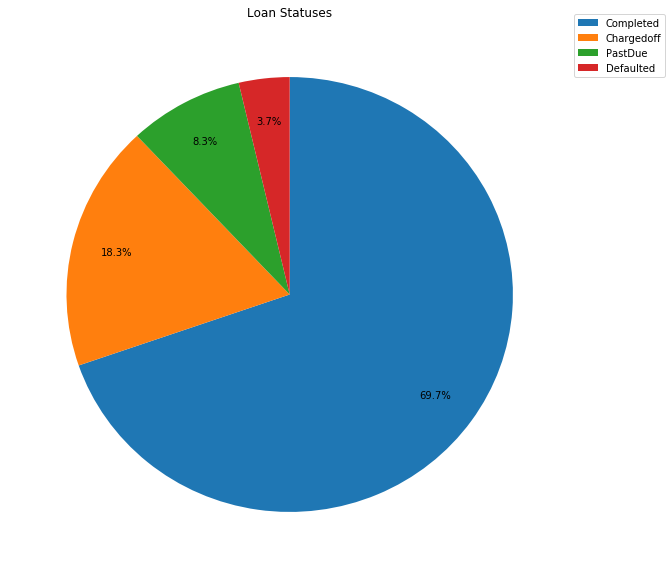

In [42]:
#Prepare the relevant information for the pie chart
loan_sub = loan_sub.loc[~loan_sub['LoanStatus'].isin(['Current'])]
Total = loan_sub['LoanStatus'].value_counts().sum()
Current = loan_sub[loan_sub['LoanStatus']== 'Current'].shape[0] *100/Total
Completed = loan_sub[loan_sub['LoanStatus']== 'Completed'].shape[0]  *100/Total
Chargedoff = loan_sub[loan_sub['LoanStatus']== 'Chargedoff'].shape[0]  *100/Total
Defaulted = loan_sub[loan_sub['LoanStatus']== 'Defaulted'].shape[0]  *100/Total
PastDue = loan_sub[(loan_sub['LoanStatus'] == 'Past Due (1-15 days)') | 
                 (loan_sub['LoanStatus'] == 'Past Due (31-60 days)') |
                 (loan_sub['LoanStatus'] == 'Past Due (61-90 days)') | 
                 (loan_sub['LoanStatus'] == 'Past Due (91-120 days)') |
                 (loan_sub['LoanStatus'] == 'Past Due (16-30 days)') | 
                 (loan_sub['LoanStatus'] == 'FinalPaymentInProgress') |
                 (loan_sub['LoanStatus'] == 'Past Due (>120 days)')].shape[0]  *100/Total
loan_sub.LoanStatus.value_counts()

#Plot the pie chart for the loan status only for Completed, Chargedoff, Defaulted and with the PastDue
plt.figure(figsize=[10,10])
status_order = [Completed, Chargedoff, PastDue, Defaulted]
labels = [ 'Completed', 'Chargedoff', 'PastDue', 'Defaulted']
plt.pie(status_order, startangle = 90, counterclock= False, autopct='%1.1f%%', pctdistance=0.8);
plt.legend(labels, loc="best", bbox_to_anchor=(1,1.025))
plt.title('Loan Statuses');

## The Employment Status

> According to the graph below, most of the loan takers are Employed and Full-time employed.

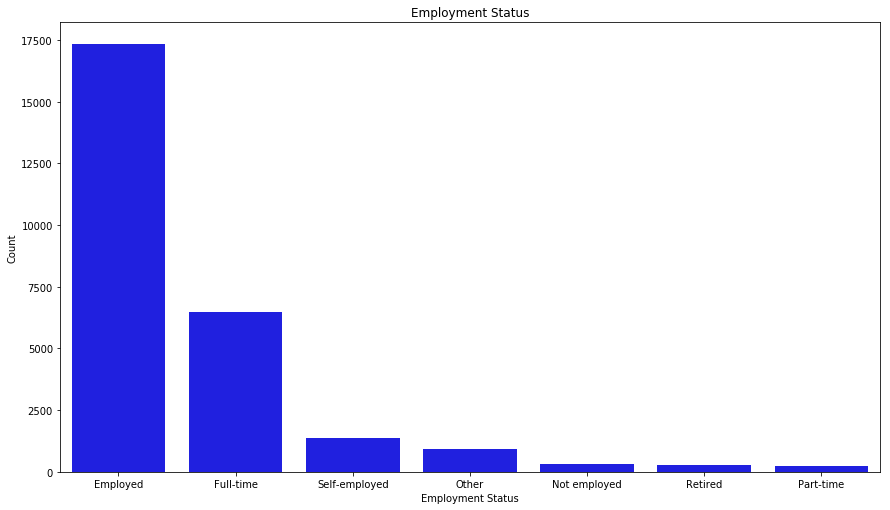

In [43]:
plt.figure(figsize=[14.70, 8.27])
order = loan_sub['EmploymentStatus'].value_counts().index
sb.countplot(data = loan_sub, x= 'EmploymentStatus', order = order, color = 'blue');
plt.title('Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count');

## The Stated Monthly Income

> The Stated Monthly Income is between a min 0 and max 618547 salary range per month. The distribution is right skewed with the mean 5534 and the standard deviation 6758. However, due to the outliers which are presented with the high salaries and based on the bar chart below, we can see that most of the loan payers are in the Medium group with a salary per month from 2500 to 8000. Additionally, there is a normal distribution for a range between 0 and 10000 US Dollars per month.

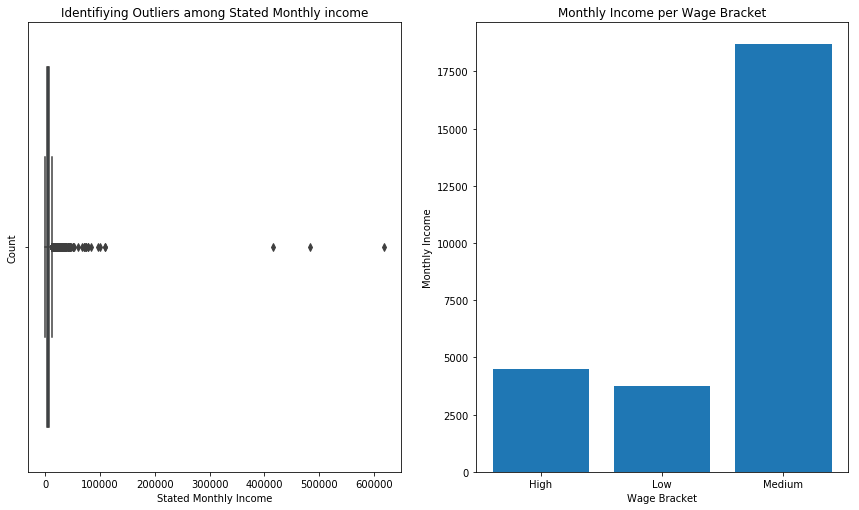

In [44]:
#Identifiyng outliers
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
plt.figure(figsize=[14.70, 8.27])

plt.subplot(1,2,1)
sb.boxplot(x=loan_sub['StatedMonthlyIncome'])
plt.title('Identifiying Outliers among Stated Monthly income')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Count')
plt.plot()


plt.subplot(1,2,2)
def classify(row):
    if row["StatedMonthlyIncome"]<2500:
        return 'Low'
    if row["StatedMonthlyIncome"]<8000:
        return 'Medium'
    else:
        return 'High'
    
loan_sub["WageBracket"] = loan_sub.apply(classify, axis=1);
plt.bar(loan_sub["WageBracket"].value_counts().index,loan_sub["WageBracket"].value_counts())
plt.ylabel('Monthly Income')
plt.xlabel('Wage Bracket')
plt.title('Monthly Income per Wage Bracket');

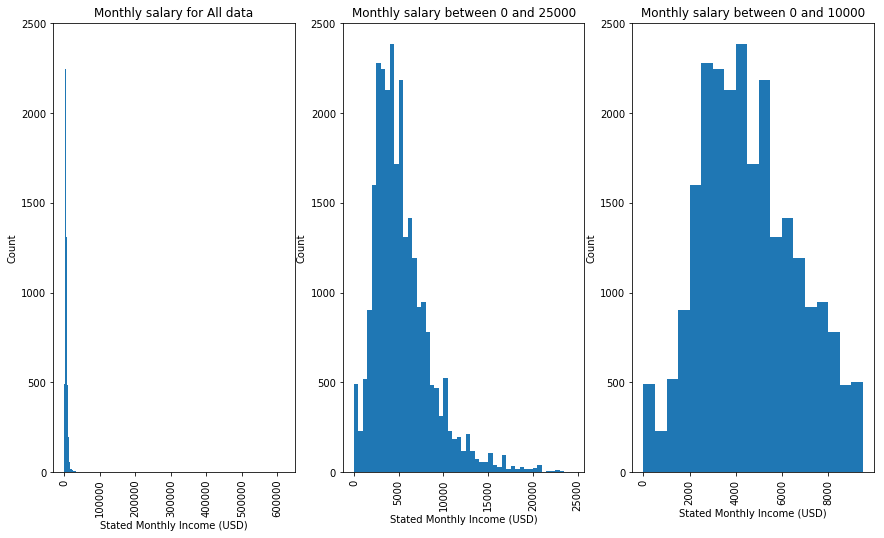

In [45]:
# Playng with the bins, i found out the the distribution of the StateMonthlyIncome for all data is right skewed distribution
# When we want to take a look only to the group of which salary is less than 10000, 
# the distribution look normal with a pick at around 4000 (Average salary)
plt.figure(figsize=[14.70, 8.27])

plt.subplot(1,3,1)
bins = np.arange(0, 618548, 500)
plt.hist(data =  loan_sub, x= 'StatedMonthlyIncome', bins = bins);
plt.title('Monthly salary for All data')
plt.xlabel('Stated Monthly Income (USD)')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.subplot(1,3,2)
bins = np.arange(0, 25000, 500)
plt.hist(data =  loan_sub, x= 'StatedMonthlyIncome', bins = bins);
plt.title('Monthly salary between 0 and 25000')
plt.xlabel('Stated Monthly Income (USD)')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.subplot(1,3,3)
bins = np.arange(0, 10000, 500)
plt.hist(data =  loan_sub, x= 'StatedMonthlyIncome', bins = bins)
plt.title('Monthly salary between 0 and 10000')
plt.xlabel('Stated Monthly Income (USD)')
plt.xticks(rotation=90)
plt.ylabel('Count');


##   The Loan Original Amount
>The Loan Original Amount has a right skewed distribution with the peak at around 4800. 


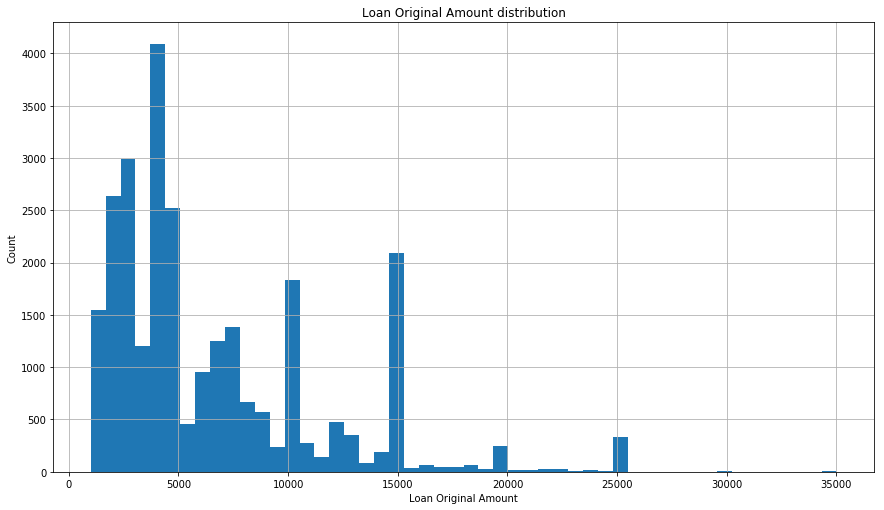

In [46]:
plt.figure(figsize=[14.70, 8.27])
# Loan Original Amount distribution is right skewed
loan_sub.LoanOriginalAmount.hist(bins = 50)
plt.title('Loan Original Amount distribution')
plt.xlabel('Loan Original Amount')
plt.ylabel('Count');

## The Borrower APR and The Borrower Rate 
> The Borrower APR and the Borrower Rate show slightly left skewed distributions with the second spike at 0.37 for Borrower APR and at 0.32 for Borrower Rate.

>Interestingly, the shape of the Borrower APR and Borrower Rate distributions share some similarities. It's likely that two variables will be correlated with one another.

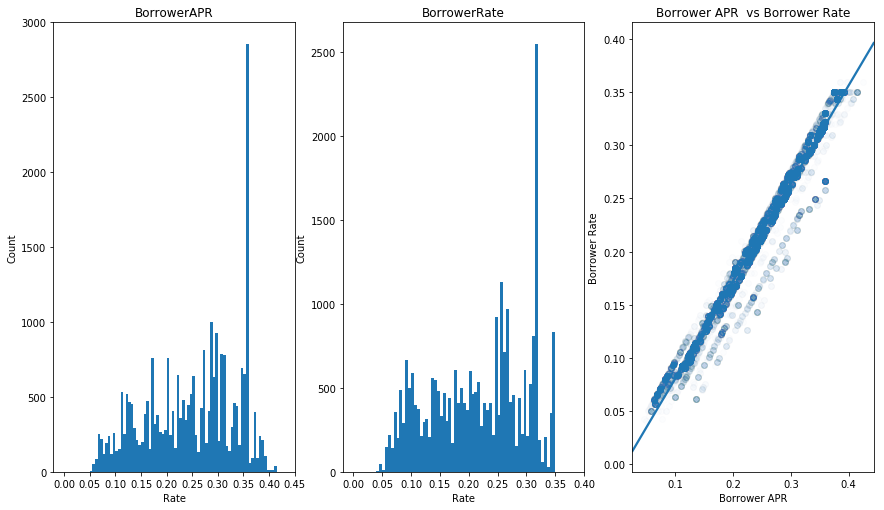

In [47]:
plt.figure(figsize=[14.70, 8.27])
# BorrowerAPR distribution 
plt.subplot(1,3,1)
bins = np.arange(0, loan_sub['BorrowerAPR'].max(), 0.005)
plt.hist(data =  loan_sub, x= 'BorrowerAPR', bins =bins)
plt.title('BorrowerAPR')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.xticks(np.arange(0, loan_sub['BorrowerAPR'].max()+0.05, 0.05));

# BorrowerRate distribution
plt.subplot(1,3,2)
bins = np.arange(0, loan_sub['BorrowerRate'].max(), 0.005)
plt.hist(data =  loan_sub, x= 'BorrowerRate', bins =bins)
plt.title('BorrowerRate')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.xticks(np.arange(0, loan_sub['BorrowerRate'].max()+0.05, 0.05));

# BorrowerAPR vs BorrowerRate
plt.subplot(1,3,3)
sb.regplot(data = loan_sub, x= 'BorrowerAPR', y= 'BorrowerRate', scatter_kws={'alpha':0.01})
plt.title('Borrower APR  vs Borrower Rate')
plt.xlabel('Borrower APR')
plt.ylabel('Borrower Rate');

## The Loan Status vs Employment Status 
> When we investigate the relationship between Loan Status and Employment Status, we can see that only Employed customers show the status as Past Due. It may be due to the postponed Salary. The Status to be Employed also shows a very outstanding level of the loan completion as well as Full-Time employed status.

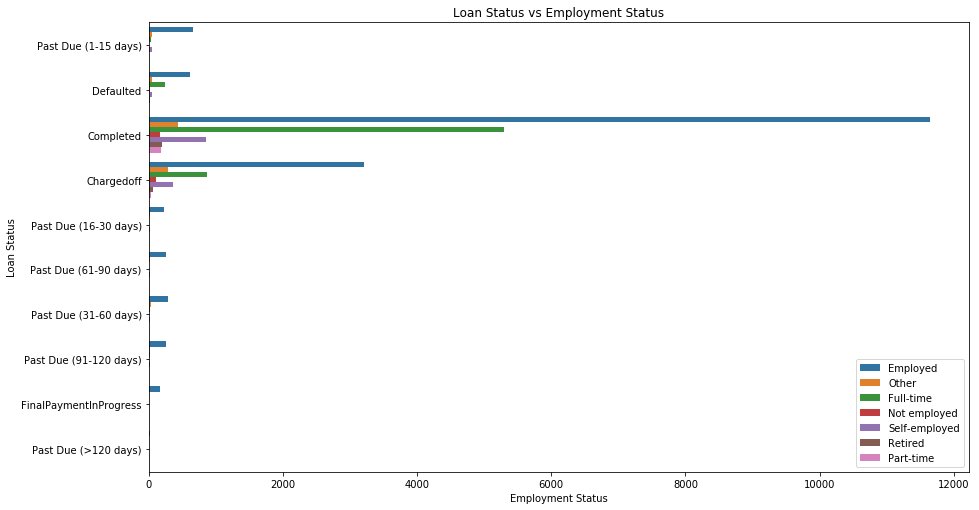

In [48]:
#LoanStatus vs EmploymentStatus - COUNTPLOT
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data = loan_sub, y='LoanStatus', hue='EmploymentStatus')
plt.legend(loc='lower right')
plt.title('Loan Status vs Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Loan Status');

## The Loan Status vs Stated Monthly Income
## The Loan status vs Loan Original Amount
> According to the boxplots with Stated Monthly Income, we see that the mean of Completed Loans is slightly higher than the Defaulted, while the original loan amount does not show the differences beetween means of two groups.

> According to the violinplots, both groups Completed and Defaulted refer to the Loans with original amount less than 5000 and higher for the Stated monthly Salary between 2000 and 6000.

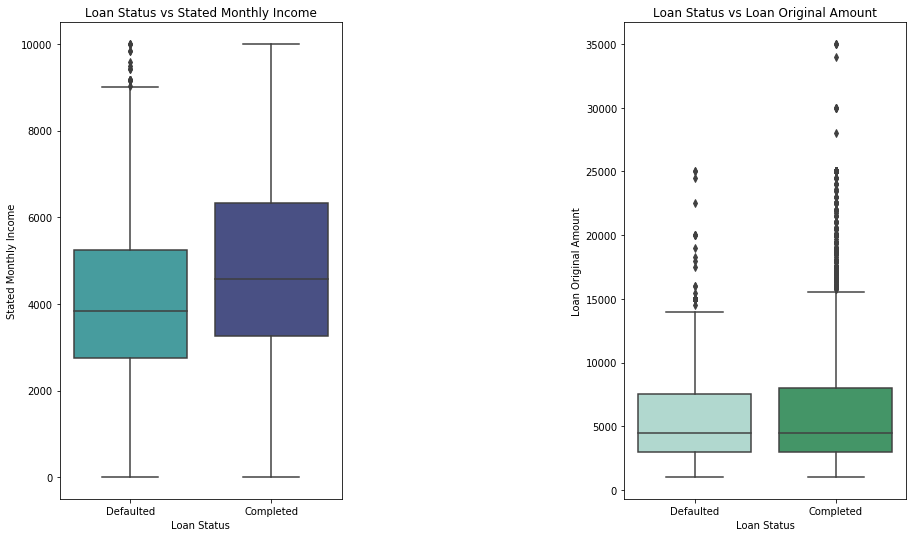

In [49]:
# filtereing Loan Status for the Completed and Defaulted and without outliers for the monthly salary
loan_sub = loan_sub[(loan_sub['LoanStatus'] == 'Completed') | 
                    (loan_sub['LoanStatus'] == 'Defaulted')]
loan_sub =loan_sub.loc[loan_sub['StatedMonthlyIncome'] <= 10000]

plt.figure(figsize=[14.70, 8.27])

#LoanStatus vs StatedMonthlyIncome - BOXPLOT
plt.subplot(1,2,1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9 , wspace=1, hspace=0.2)
sb.boxplot(data = loan_sub, x='LoanStatus', y='StatedMonthlyIncome', palette = 'mako_r');
plt.title('Loan Status vs Stated Monthly Income')
plt.ylabel('Stated Monthly Income')
plt.xlabel('Loan Status')

#LoanStatus vs LoanOriginalAmount   - BOXPLOT
plt.subplot(1,2,2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9 , wspace=1, hspace=0.2)
sb.boxplot(data = loan_sub, x='LoanStatus', y='LoanOriginalAmount', palette= 'BuGn')
plt.title('Loan Status vs Loan Original Amount')
plt.ylabel('Loan Original Amount')
plt.xlabel('Loan Status');

## The Loan Status vs Prosper Rating
>  According to the below plots, we can see that only a few borrowers have defaulted loans with a Prosper Rating of AA (lowest risk), while the proportion of defaulted loans in the rating groups HR, E and D (high risk groups) are significantly higher. On the other hand, the highest number of Completed loans also is in the Rating group D.

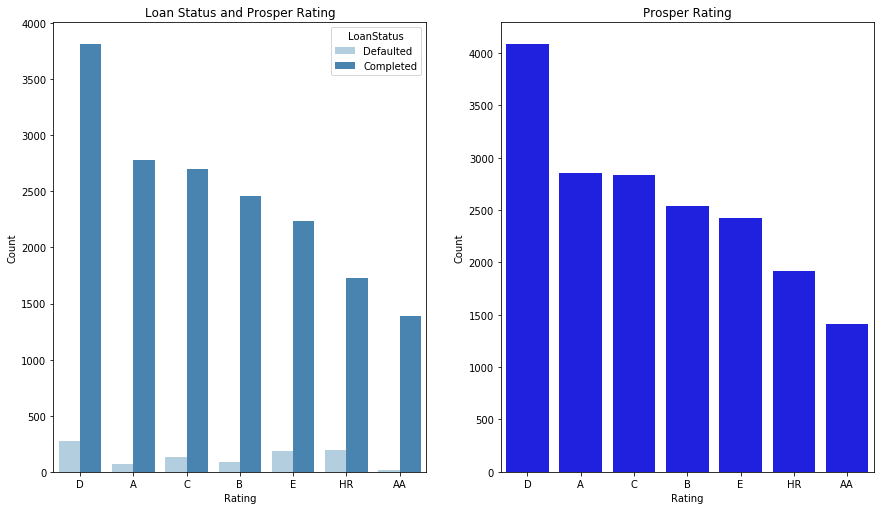

In [50]:
#LoanStatus vs ProsperRating - COUNTPLOT
# 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA

plt.figure(figsize=[14.70, 8.27])

plt.subplot(1,2,1)
order = loan_sub['ProsperRating'].value_counts().index
sb.countplot(data = loan_sub, x='ProsperRating', hue='LoanStatus', palette= 'Blues', order = order);
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Loan Status and Prosper Rating')

plt.subplot(1,2,2)
order = loan_sub['ProsperRating'].value_counts().index
sb.countplot(data = loan_sub, x= 'ProsperRating', order = order, color = 'blue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Prosper Rating');

## The Loan Status vs Borrower APR
> The mean of the Defaulted loans is higher than for the Completed. The most of the loans which were defaulted have Borrower APR higher than 0.25. Conclusively, the higher the Borrower APR, the higher is the possibility for Defaulted loan. On the other hand, from the violinplot we can see that the Completed cases are evenly distributed for the Borrower APR between 0.1 and 0.35 with the mean at 0.25.


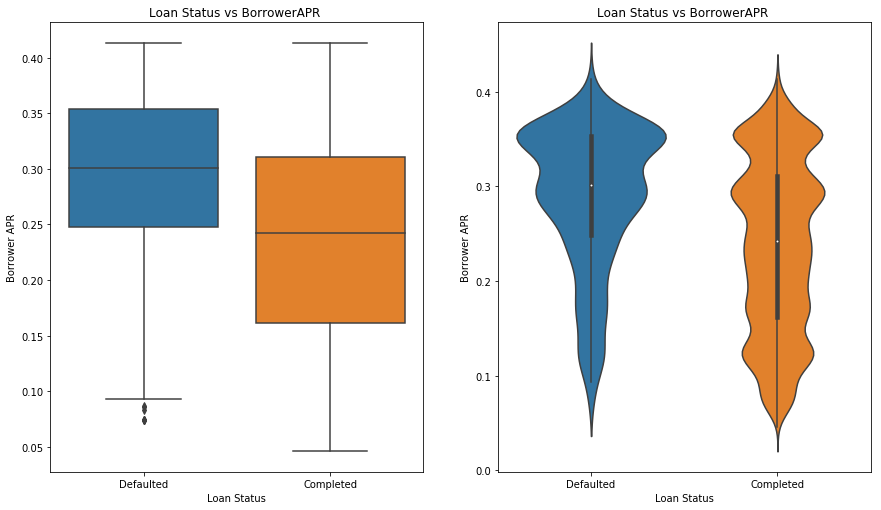

In [51]:
#LoanStatus vs BorrowerAPR - BOXPLOT and VIOLINPLOT
plt.figure(figsize=[14.70, 8.27])

plt.subplot(1,2,1)
sb.boxplot(data = loan_sub, x='LoanStatus', y='BorrowerAPR');
plt.title('Loan Status vs BorrowerAPR ')
plt.xlabel('Loan Status')
plt.ylabel('Borrower APR')

plt.subplot(1,2,2)
sb.violinplot(data = loan_sub, x='LoanStatus', y='BorrowerAPR')
plt.title('Loan Status vs BorrowerAPR ')
plt.xlabel('Loan Status')
plt.ylabel('Borrower APR');

## LoanStatus vs EmploymentStatus vs StatedMonthlyIncome 
> The top 3 Employment Statuses are Employed, Full-time and Self-Employed show the highest number of Completed as well as Defaulted loans. The data sharply fell for both Completed and Defaulted for the Not Employed which can be explained by that the loans preferably should not be given for unemployed customers.

## The Loan Status vs LoanOriginalAmount vs EmploymentStatus 
>  The Employed Status group shows that even with the high Loan original amount as 7000 the loans are completed, while we can observe that for other groups of employments the higher the Loan Amount - the higher the Defaulted cases.

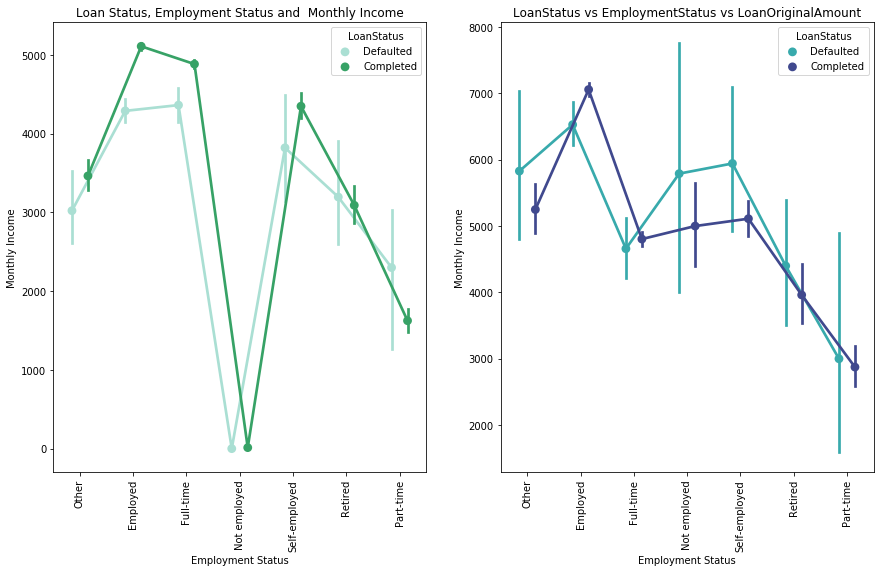

In [52]:
plt.figure(figsize=[14.70, 8.27])
plt.subplot(1,2,1)
sb.pointplot(data = loan_sub, x='EmploymentStatus', y='StatedMonthlyIncome', hue='LoanStatus', 
             dodge=0.3, linestyles= "-", palette = 'BuGn');
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Monthly Income')
plt.title('Loan Status, Employment Status and  Monthly Income')
plt.subplot(1,2,2)
sb.pointplot(data = loan_sub, x='EmploymentStatus', y='LoanOriginalAmount', hue='LoanStatus', dodge=0.3, linestyles= "-", palette = 'mako_r')
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Monthly Income')
plt.title('LoanStatus vs EmploymentStatus vs LoanOriginalAmount');

## The Loan Status  vs Stated Monthly Income vs Loan Original Amount
> According to the graph below, we can see that the most of the Defaulted loans have less than 15000 Original Loan Amount and less than 7000 Monthly salary. However, the most of the Completed loans are also in the range between 2000 and 5000 monthly Salary and with less than 15000 Loan Amount.

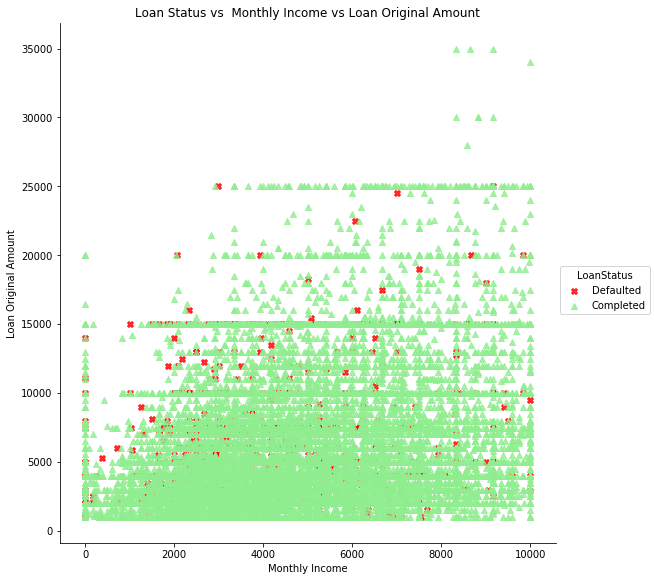

In [61]:
#LoanStatus vs StatedMonthlyIncome vs LoanOriginalAmount - LMPLOT

palette = [ 'r', 'lightgreen'];
sb.lmplot(x='StatedMonthlyIncome', y='LoanOriginalAmount', hue='LoanStatus', data=loan_sub.loc[loan_sub['LoanStatus'].isin(['Completed', 'Defaulted'])], size=8, markers=['X', '^'], palette=palette, fit_reg=False);
plt.title('Loan Status vs  Monthly Income vs Loan Original Amount');
plt.xlabel('Monthly Income', fontsize=10);
plt.ylabel('Loan Original Amount', fontsize=10);

##  The Borrower APR vs Loan Original Amount vs Stated Monthly Income 

> There is a negative correlation of -0.25 between "BorrowerAPR" and "Loan original amount" and -0.18 between "BorrowerAPR" and "StatedMonthlyIncome".

> As we have also seen from Bivariate Exploratrion, "Loan original amount" and "StatedMonthlyIncome" have a positive correlation which is 0.28.

                     BorrowerAPR  StatedMonthlyIncome  LoanOriginalAmount
BorrowerAPR             1.000000            -0.177891           -0.247856
StatedMonthlyIncome    -0.177891             1.000000            0.279661
LoanOriginalAmount     -0.247856             0.279661            1.000000


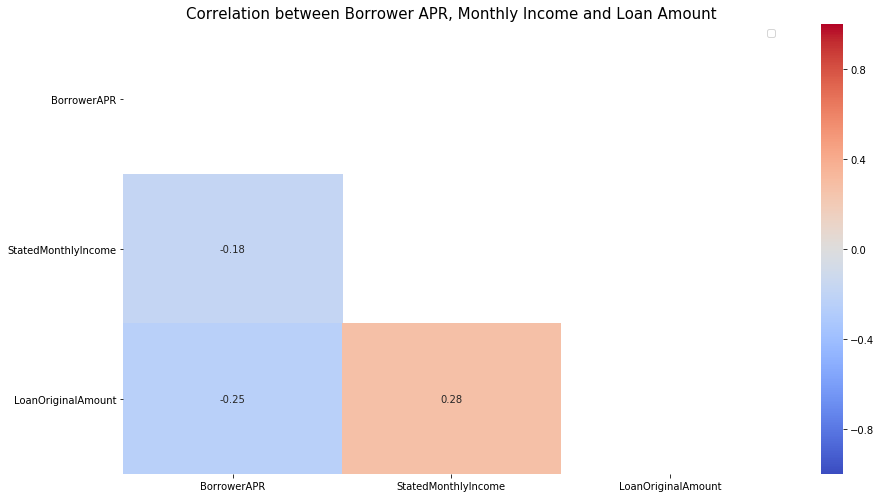

In [54]:
loan_sub_m = loan_sub[["BorrowerAPR", "StatedMonthlyIncome", "LoanOriginalAmount"]]
plt.figure(figsize=[14.70, 8.27])

mask = np.zeros(loan_sub_m.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

sb.heatmap(loan_sub_m.corr(), annot=True,cmap='coolwarm', vmin = -1, vmax = 1, center = 0, mask=mask);
plt.title('Correlation between Borrower APR, Monthly Income and Loan Amount', fontsize=15, )
plt.yticks(rotation = 0)
labels = ["BorrowerAPR", "StatedMonthlyIncome", "LoanOriginalAmount"]
plt.legend(labels)

print(loan_sub_m.corr());

## The Loan Status vs ProsperRating vs Borrower APR
> According to the graphs below, there are less Defaulted cases for the Prosper Rating AA with the Borrower APR around 0.1. We also can observe for the Rating HR - the highest risk - that nevertheless the most of the loans are Completed, there are few Defaulted

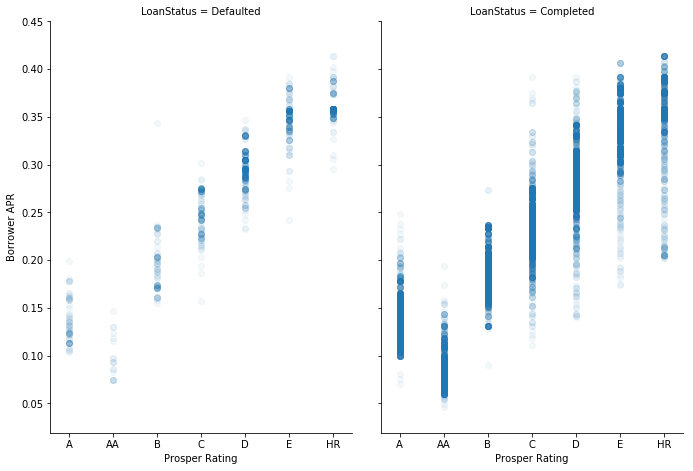

In [55]:
g = sb.FacetGrid(data=loan_sub, col='LoanStatus', col_wrap=3)
g = (g.map_dataframe(plt.scatter, 'ProsperRating','BorrowerAPR' , alpha=0.05).set_axis_labels('Prosper Rating', 'Borrower APR'))
g.fig.set_size_inches(14.70, 8.27);

## Conclusion
>  The Prosper Rating does have an effect on the Loan Status: there are a few borrowers which have defaulted loans with Prosper Rating  AA (lowest risk), while the proportion of defaulted loans in the rating groups HR, E and D (high risk groups) are significantly higher. The highest number of Completed loans are in the Rating group D.

>  The Borrower APR has an effect on the Loan Status: the most of the loans which were defaulted have a Borrower APR higher than 0.25. Conclusively, the higher the Borrower APR, the higher the possibility for Defaulted loan. On the other hand, from the violinplot we can see that the Completed cases are evenly distributed for the Borrower APR between 0.1 and 0.35 with the mean at 0.25.

>  The group with the highest rate of Completed Loans is Employed/Full-time with a Monthly income range between 2500 and 8000 with Loan Amount not higher than 7000.

### References:
1. https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed  
2. https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f 
3. https://www.lendacademy.com/prosper-review/
4. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
5. https://seaborn.pydata.org/generated/seaborn.heatmap.html
6. https://towardsdatascience.coxm/data-visualization-using-seaborn-fc24db95a850
7. https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
8. https://www.kaggle.com/residentmario/multivariate-plotting
9. https://seaborn.pydata.org/generated/seaborn.lmplot.html

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [68]:
!jupyter nbconvert Slide_deck_template_6.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Slide_deck_template_6.ipynb to slides
[NbConvertApp] Writing 989162 bytes to Slide_deck_template_6.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/site-packages